# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data from CSV

In [ ]:
df = pd.read_csv('pizza_sales.csv')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Basic Information

In [ ]:
df.shape

(48620, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [ ]:
df.dtypes

,0
pizza_id,int64
order_id,int64
pizza_name_id,object
quantity,int64
order_date,object
order_time,object
unit_price,float64
total_price,float64
pizza_size,object
pizza_category,object


# Columns

In [ ]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

# Data Cleaning

In [ ]:
df.isnull().sum()

,0
pizza_id,0
order_id,0
pizza_name_id,0
quantity,0
order_date,0
order_time,0
unit_price,0
total_price,0
pizza_size,0
pizza_category,0


In [ ]:
df.dropna(inplace=True)

# Description

In [ ]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# Exploratory Data Analysis

## Correlation

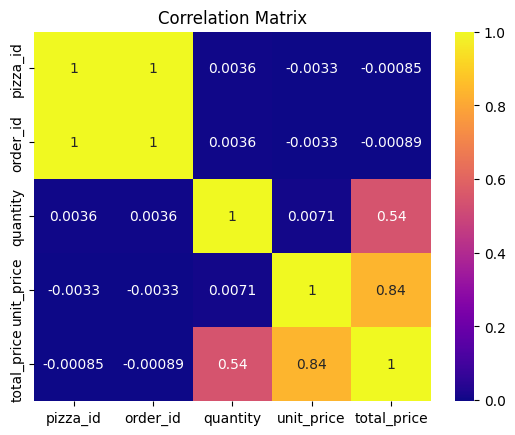

In [ ]:
sns.heatmap(df[['pizza_id','order_id','quantity','unit_price','total_price']].corr(),annot=True,cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

From above graph we see that strong relation between unit price and total price

## Size

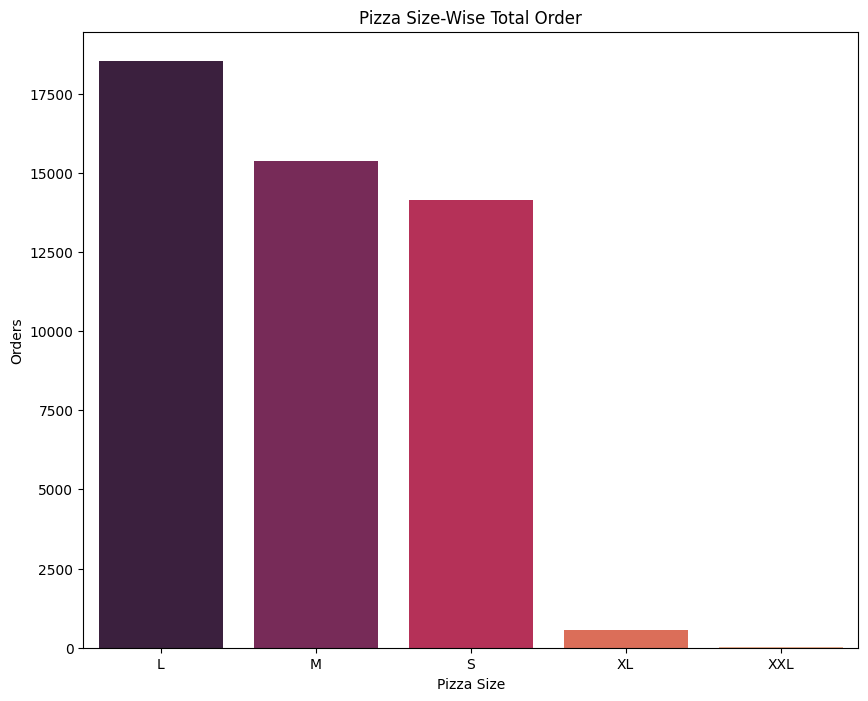

In [ ]:
size_pizza = df.groupby(['pizza_size'],as_index=False)['quantity'].count().sort_values(by='quantity',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='pizza_size',y='quantity',hue='pizza_size',legend=False,data=size_pizza,palette='rocket')
plt.title('Pizza Size-Wise Total Order')
plt.xlabel('Pizza Size')
plt.ylabel('Orders')
plt.show()

From above graph we see that large, medium and small size pizza is highly ordered by customers

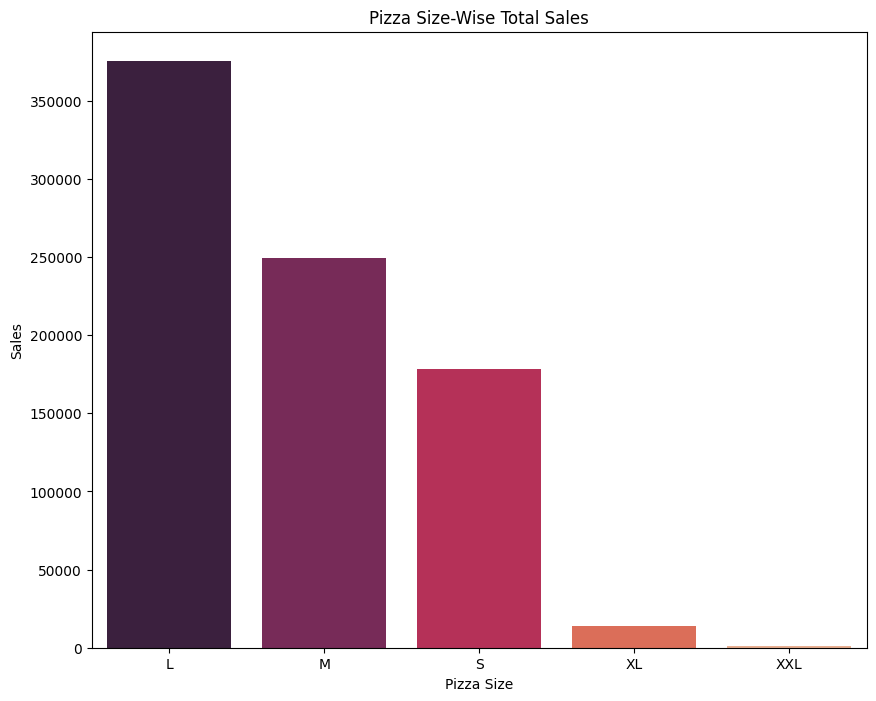

In [ ]:
sales = df.groupby(['pizza_size'],as_index=False)['total_price'].sum().sort_values(by='total_price',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='pizza_size',y='total_price',hue='pizza_size',legend=False,data=sales,palette='rocket')
plt.title('Pizza Size-Wise Total Sales')
plt.xlabel('Pizza Size')
plt.ylabel('Sales')
plt.show()

From the above graph we see that large size pizza sales is above of 3.5 lakh and gape between large and medium size in sales is more than 1 lakh

## Category

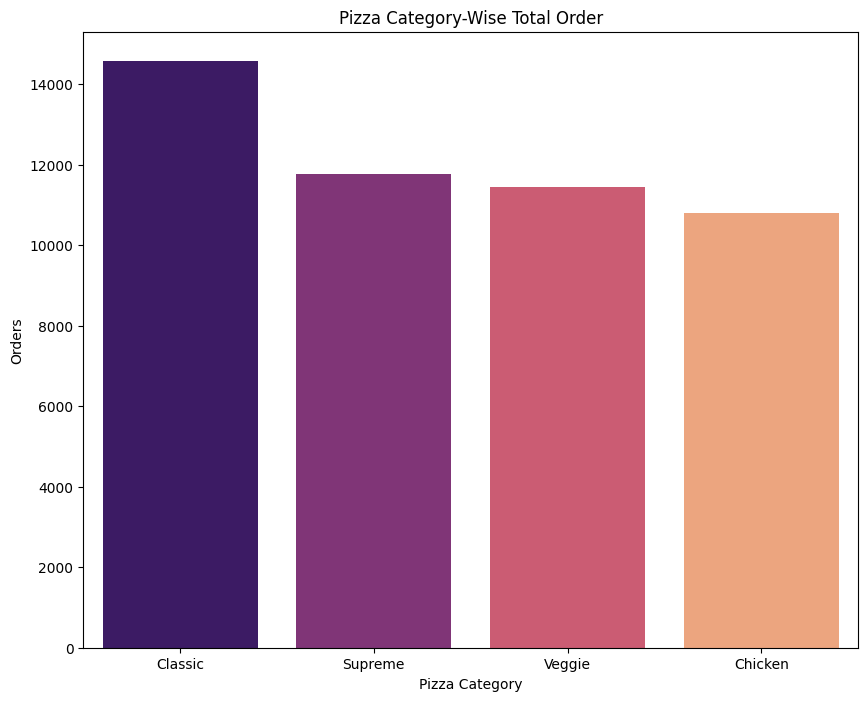

In [ ]:
category = df.groupby(['pizza_category'],as_index=False)['quantity'].count().sort_values(by='quantity',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='pizza_category',y='quantity',hue='pizza_category',legend=False,data=category,palette='magma')
plt.title('Pizza Category-Wise Total Order')
plt.xlabel('Pizza Category')
plt.ylabel('Orders')
plt.show()

From the above graph we see that classic pizza is highly ordered by customers while supreme, veggie and chicken pizza's is less than 12 thousands

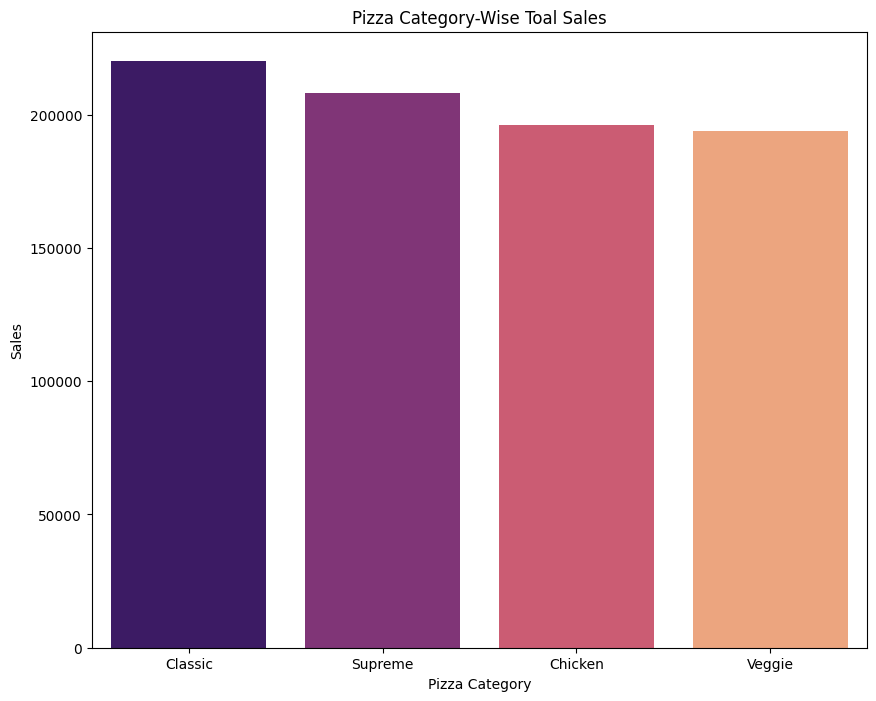

In [ ]:
category = df.groupby(['pizza_category'],as_index=False)['total_price'].sum().sort_values(by='total_price',ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(x='pizza_category',y='total_price',hue='pizza_category',legend=False,data=category,palette='magma')
plt.title('Pizza Category-Wise Toal Sales')
plt.xlabel('Pizza Category')
plt.ylabel('Sales')
plt.show()

From the above graph we see that classic and supreme pizza's sales is more than 2 lakhs while chicken and veggie pizza's sales is less than 2 lakhs

## Best Selling Pizza

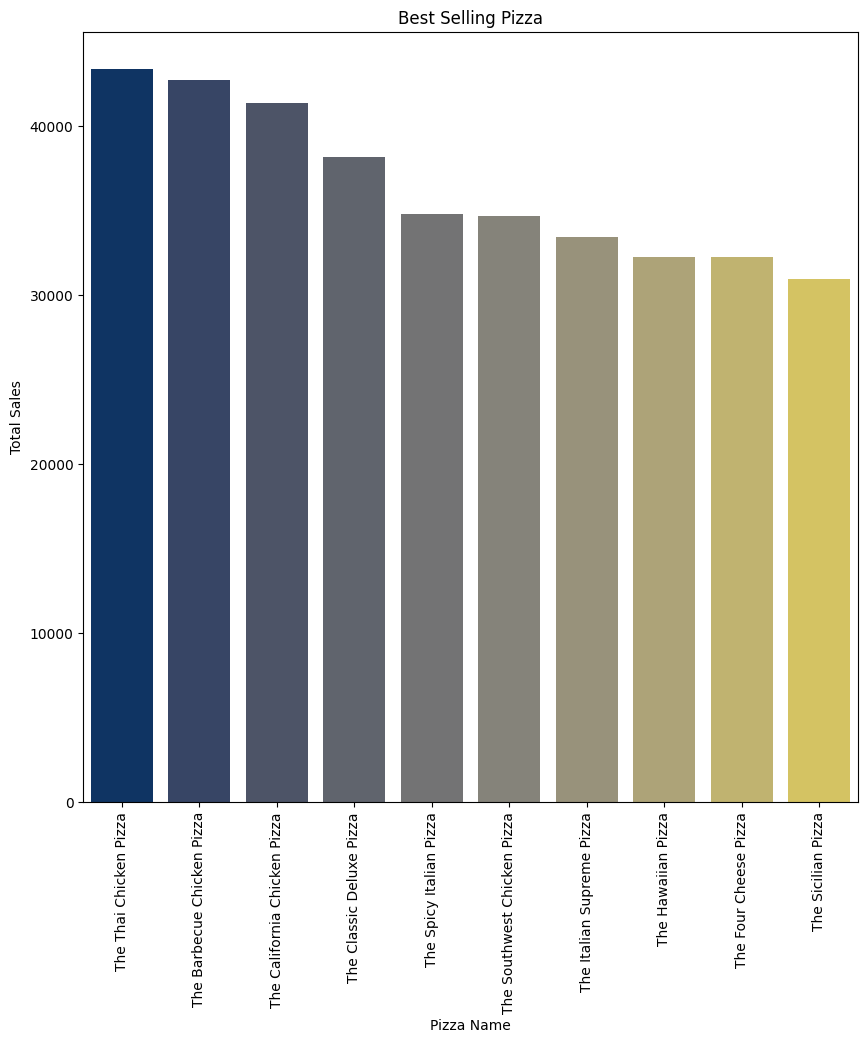

In [ ]:
best_selling_pizza = df.groupby(['pizza_name'],as_index=False)['total_price'].sum().sort_values(by='total_price',ascending=False).head(10)
plt.figure(figsize=(10,10))
sns.barplot(data=best_selling_pizza,x='pizza_name',y='total_price',hue='pizza_name',legend=False,palette='cividis')
plt.title('Best Selling Pizza')
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

From above graph we see that top 10 best selling pizza's name

## Monthly Sales

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'order_month'],
      dtype='object')

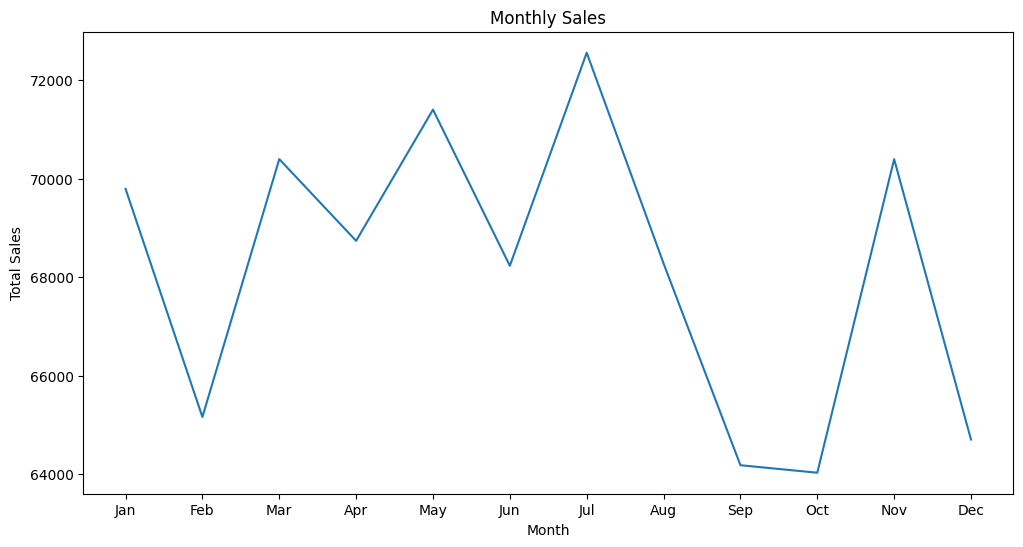

In [ ]:
monthly_sales = df.groupby(['order_month'],as_index=False)['total_price'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='order_month', y='total_price')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

From above graph we see that sales is higher in between june-July and lower in between september-october

# Conclusion
Exploratory Data Analysis shows that Classic Pizza's large size pizza has the highest sales and the sales were lowest in the months of September and October and the sales were highest in June and July. Also, Thai Chicken Pizza, Barbecue Chicken Pizza and California Chicken Pizza had the highest sales followed by other pizzas.